##### Forecast the CocaCola prices data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas.plotting import lag_plot
%matplotlib inline

import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the DataSet

df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
# Checking for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [4]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [5]:
df = df.drop_duplicates()
df.shape

(42, 2)

<AxesSubplot:>

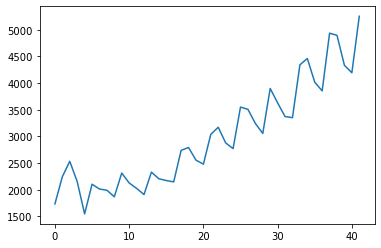

In [6]:
# Identifying past trends

df.Sales.plot()

<AxesSubplot:ylabel='Density'>

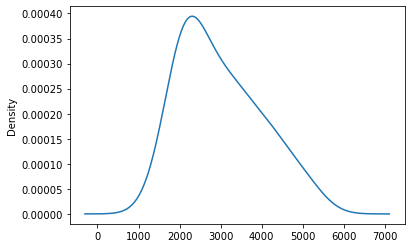

In [7]:
df.Sales.plot(kind = 'kde')

<AxesSubplot:ylabel='Frequency'>

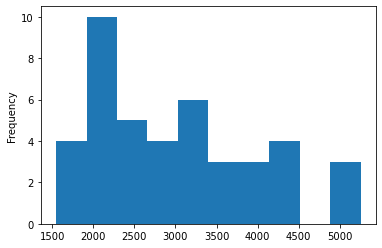

In [8]:
df.Sales.plot(kind = 'hist')

In [9]:
c = pd.read_excel('CocaCola_Sales_Rawdata.xlsx',header=0,index_col=0,parse_dates=True,squeeze=True)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

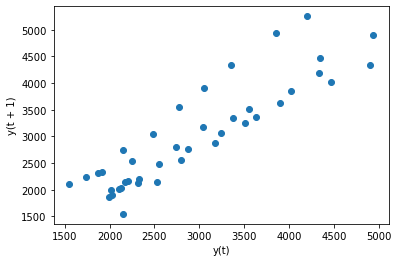

In [10]:
lag_plot(c)

In [11]:
'''Seperating and Aggregating the Quarters and years present 
in the 'Quarter' column of the original data, in order to do one hot encoding.'''

df['Quarters']=0
df['Year']=0

for i in range(42):
    p=df['Quarter'][i]
    df['Quarters'][i]=p[0:2]
    df['Year'][i]=p[3:5]    
df.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [12]:
quater_dumies=pd.DataFrame(pd.get_dummies(df['Quarters']))
quater_dumies.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [13]:
'''Concatinating the new dummy variables that are 
created for the Quarter column with the original dataset'''

df = pd.concat([df, quater_dumies], axis = 1)
df.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


In [14]:
# Creating a time column

df['time']=range(1,43)

In [15]:
# Creating a squared time column for the dataset, which will be used in the Quadratic model

df['time_sqr'] = df['time']*df['time']

In [16]:
# Creating a log transformation

df['log_sales'] = np.log(df['Sales'])
df.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,time,time_sqr,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


<AxesSubplot:xlabel='Quarters', ylabel='Sales'>

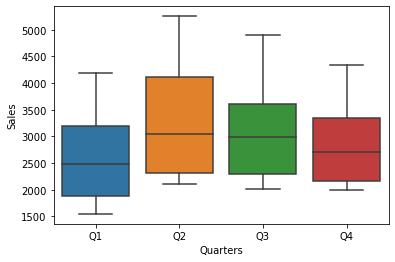

In [17]:
# Box plot

sns.boxplot(x = 'Quarters', y = 'Sales', data = df)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

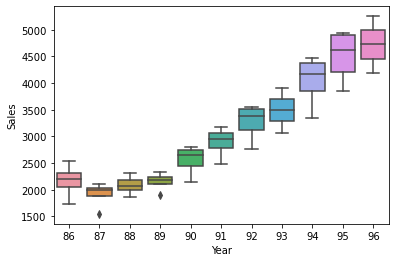

In [18]:
# Sales of coca cola throughout the years with 4 components - Trend, Cyclic,Seasonality and Irregularity component

sns.boxplot(x = 'Year', y = 'Sales', data = df)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

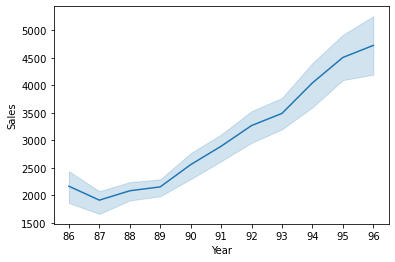

In [19]:
# Line Plot

sns.lineplot(x = 'Year', y = 'Sales', data = df)

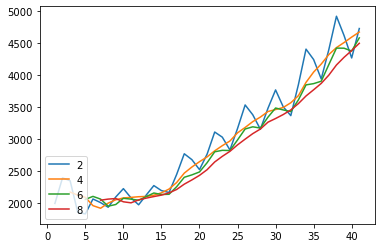

In [20]:
# Moving Average

for i in range(2,10,2):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

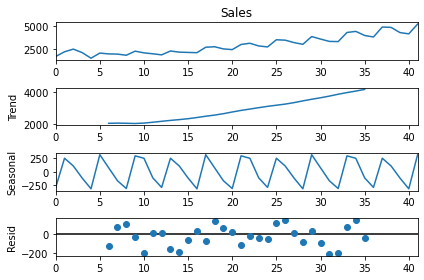

In [21]:
# Time series decomposition plot

decompose_ts_add = seasonal_decompose(df.Sales, period = 12)
decompose_ts_add.plot()
plt.show()

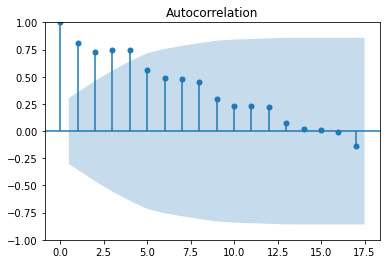

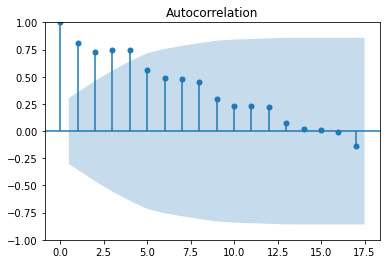

In [22]:
# ACF Plots and PACF Plots

import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(df.Sales)

##### Performing the model driven methods on the dataset

In [23]:
# Splitting the data

train = df.head(30)
test = df.tail(12)

In [24]:
# Linear model

linear_model = smf.ols('Sales~time',data=df).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['time'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

449.79962261229645

In [25]:
# Exponential model

Exp = smf.ols('log_sales~time',data=df).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['time'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

417.5608283749833

In [26]:
# Quadratic model

Quad = smf.ols('Sales~time+time_sqr',data=df).fit()
pred_Quad = pd.Series(Quad.predict(test[["time","time_sqr"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

394.75561592701087

In [27]:
# Additive Seasonality

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=df).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1305.6638874921075

In [28]:
# Additive Quadratic Seasonality

add_sea_Quad = smf.ols('Sales~time+time_sqr',data=df).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['time','time_sqr','Q1','Q2','Q3','Q4']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

394.75561592701087

In [29]:
# Multiplicative Seasonality 

Mul_sea = smf.ols('log_sales~Q1+Q2+Q3+Q4',data = df).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1435.5011310008917

In [30]:
# Multiplicate Additive Seasonality

Mul_Add_sea = smf.ols('log_sales~time+Q1+Q2+Q3+Q4',data = df).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

172.15056883930023

In [31]:
# Creating a DataFrame for all results to compare

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,172.150569
2,rmse_Quad,394.755616
4,rmse_add_sea_quad,394.755616
1,rmse_Exp,417.560828
0,rmse_linear,449.799623
3,rmse_add_sea,1305.663887
5,rmse_Mult_sea,1435.501131


##### Predict Whole new data

In [32]:
model_full = smf.ols('log_sales~time+Q1+Q2+Q3+Q4',data = df).fit()
pred_full = pd.Series(model_full.predict(df))
pred_fin=np.exp(pred_full)

In [33]:
df["Predicted_sales"]=pred_fin
df.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,time,time_sqr,log_sales,Predicted_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663,1539.516800
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443,1958.133190
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477,1941.716476
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529,1792.297460
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602,1695.770302


##### Conclusion

- Additive seasonality with quadratic trend has the best RMSE value.